## DATA620 Project 1 ##

Dataset: https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records  

1984 United Stated Congressional Voting Records. 435 rows (267 democrats, 168 republicans).  

The graph will be composed of nodes for members and bills, all connected by edges signifying a vote for a bill. For this project, I will be considering 'YES' votes only to simplify the analysis.

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
votes = pd.read_csv('house-votes-84.data', names=['p','v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15','v16',])
votes.head()

,p,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Cleanup:

In [12]:
votes['p'] = votes['p'].apply(lambda x: x[0])
votes['i'] = votes.index

In [197]:
vrand = votes.sample(32) # reduce the nodes to a manageble count, otherwise graph is too large.
votes_melt = pd.melt(vrand, id_vars=['i','p'])

In [198]:
yvotes = votes_melt[votes_melt.value=='y'] # keep only yes votes

In [199]:
print yvotes.head()
edges =[zip(yvotes['i'], yvotes['variable'])]
node_vals = dict(zip(yvotes.i, yvotes.p))

      i  p variable value
1    63  d       v1     y
4   179  d       v1     y
7   323  d       v1     y
8    27  d       v1     y
10  367  d       v1     y


In [200]:
G = nx.Graph()
for edge in edges:
    G.add_edges_from(edge)
    
nx.set_node_attributes(G,'p', '')
nx.set_node_attributes(G,'p', node_vals)

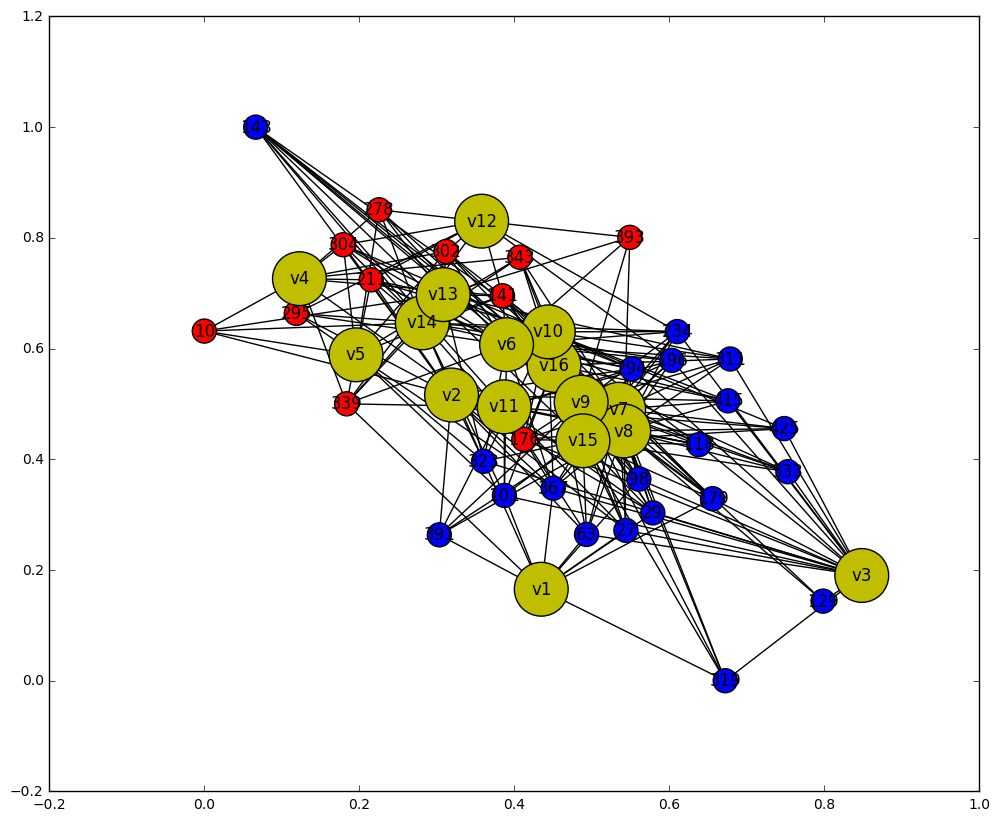

In [208]:
color_map = []
size_map = []
for node in G:
    if G.node[node]['p']=='':
        color_map.append('y')
        size_map.append(1500)
    elif G.node[node]['p']=='r':
        color_map.append('r')
        size_map.append(300)
    else:
        color_map.append('b')
        size_map.append(300)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw_networkx(G,node_color=color_map, node_size=size_map, pos=pos, with_labels=True)
plt.show()

Visual inspection shows more democrat than republican members voting for the bills (large nodes labeled 'vX')

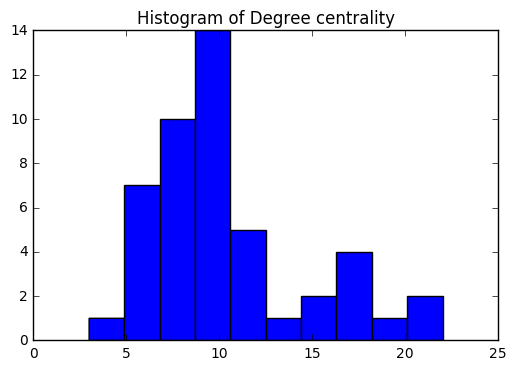

In [202]:
deg = nx.degree(G)
plt.hist(deg.values())
plt.title('Histogram of Degree centrality')
plt.show()

**Eigenvector centrality could not be computed on this graph without the error shown below. This occured regardless of trying different nextorkx parameters and graph sizes.**

In [209]:
e = nx.eigenvector_centrality(G)

NetworkXError: eigenvector_centrality():
power iteration failed to converge in %d iterations."%(i+1))

In [211]:
p = nx.get_node_attributes(G,'p')
print p

{129: 'd', 391: 'd', 'v12': '', 393: 'r', 10: 'r', 343: 'r', 'v16': '', 141: 'r', 'v14': '', 143: 'd', 278: 'r', 27: 'd', 29: 'd', 415: 'd', 304: 'r', 294: 'd', 295: 'r', 425: 'd', 302: 'r', 176: 'r', 179: 'd', 'v13': '', 'v10': '', 319: 'd', 323: 'd', 196: 'd', 339: 'r', 311: 'd', 333: 'd', 'v1': '', 'v2': '', 'v3': '', 'v4': '', 'v5': '', 'v6': '', 'v7': '', 'v8': '', 'v9': '', 'v15': '', 98: 'd', 101: 'd', 234: 'd', 367: 'd', 'v11': '', 211: 'r', 118: 'd', 63: 'd'}


I'm concerned with only the party affiliation category.

In [204]:
tmp = pd.DataFrame(p.items(), columns=['i','p'])
d = pd.DataFrame(deg.items(),columns=['i','deg'])
results = pd.concat([tmp,d['deg']],axis=1)


Raw count of votes:

In [205]:
results[results.p!=''].groupby('p').count()

,i,deg
p,,
d,20,20
r,11,11


Comparative average degree centrality per categorical group.

In [213]:
results[results.p!=''].groupby('p').mean()

,deg
p,
d,7.800000
r,7.636364


**Conclusion:** Despite the considerable democratic majority in the House at the time (as shown by the vote count), the mean centrality degree of the two groups is not significantly different. This makes sense when you consider that most members of both parties would vote on the same number of bills.